In [13]:
import numpy as np
import glob
import re

import matplotlib.pyplot as plt



In [47]:
def calculate_surface_tension(P_xx_bar, P_yy_bar, P_zz_bar, Lz_nm):
    P_xx_Pa = P_xx_bar * 101325
    P_yy_Pa = P_yy_bar * 101325
    P_zz_Pa = P_zz_bar * 101325
    Lz_m = Lz_nm * 1e-9
    gamma = 0.5 * Lz_m * (P_zz_Pa - 0.5 * (P_xx_Pa + P_yy_Pa)) * 1000
    return gamma

test

In [48]:
calculate_surface_tension(100, 100, 110, 20)

10.1325

In [49]:

# Pattern to match files of the format number.ptn (e.g., 11.ptn, 12.ptn, etc.)
pattern = 'ptn2/ptn2/nsone[0-9]*.ptn'
# pattern = 'test/nsone[0-9]*.ptn'
file_paths = glob.glob(pattern)

def extract_number(filename):
    match = re.search(r'nsone(\d+).ptn',filename)
    if match:
        return int(match.group(1))
    return 0

sorted_file_paths = sorted(file_paths, key=extract_number)
# Print the list of file paths
# print(sorted_file_paths)


In [50]:
len(sorted_file_paths)

226

#  Method 1: average of all into 1 array

In [51]:
# Read the file and calculate the surface tension for each row
all_gamma_values = []

for file_path in sorted_file_paths:
    
    gamma_values = []
    with open(file_path, 'r') as file:
        for line in file:
            components = line.strip().split()
            P_xx_bar = float(components[1])  # 2nd column
            P_yy_bar = float(components[5])  # 6th column
            P_zz_bar = float(components[9])  # 10th column

            # Assuming a constant Lz_nm, adjust as necessary for your simulation
            Lz_nm = 17 

            # Calculate the surface tension for these components
            gamma = calculate_surface_tension(P_xx_bar, P_yy_bar, P_zz_bar, Lz_nm)
            gamma_values.append(gamma)
        
        all_gamma_values.append(gamma_values)

        


In [52]:
ls = []
for item in all_gamma_values:
    ls.append(np.average(item))

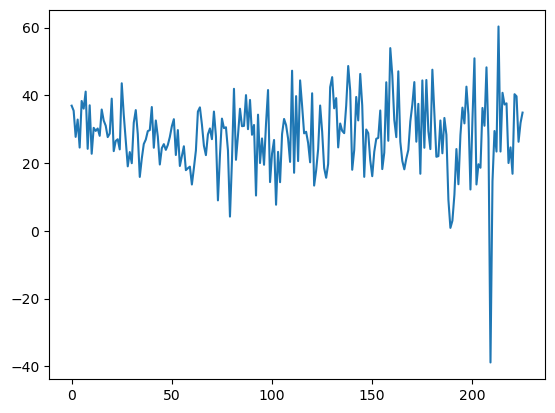

In [53]:
plt.plot(ls)

In [54]:
np.average(ls)

28.259846452371068

In [55]:

# Use np.concatenate to combine all arrays in the list into a single array
arr = np.concatenate(all_gamma_values[:100000000])


In [56]:
len(arr)

227965

In [57]:
np.average(arr)

28.173146891200695

In [58]:
np.std(arr)

192.15205583779127

In [59]:


window_size = 100
window = np.ones(window_size) / window_size
arr_rolling_avg = np.convolve(arr, window, 'valid')


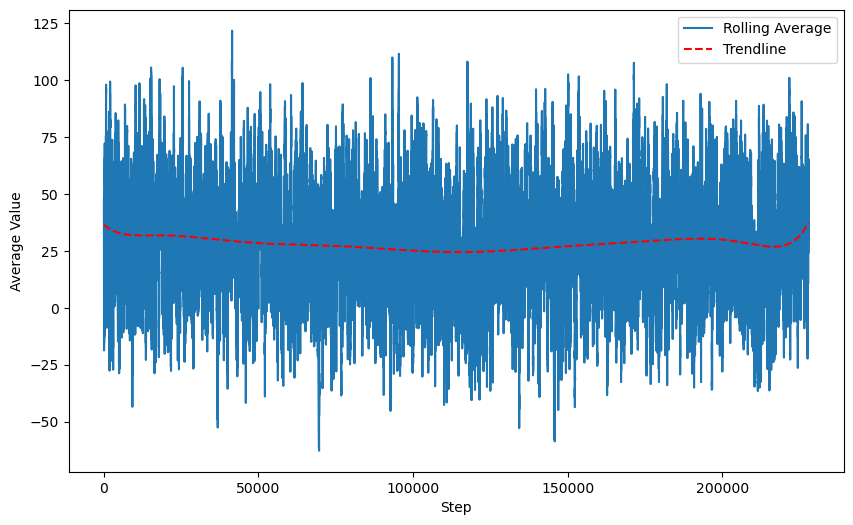

In [60]:
z = np.polyfit(range(len(arr_rolling_avg)), arr_rolling_avg, 10)  # 1 means linear fit
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.plot(arr_rolling_avg, label='Rolling Average')

# Add trendline to the plot
plt.plot(p(range(len(arr_rolling_avg))), "r--", label='Trendline')  # "r--" denotes a red dashed line


plt.xlabel('Step')
plt.ylabel('Average Value')
# plt.ylim(5,40)
plt.legend()
plt.show()

In [61]:
blocks = 10

def section_averages(array, sections=8):
    section_length = len(array) // sections
    averages = []
    
    for i in range(sections):
        start_index = i * section_length
        # For the last section, extend to the end of the array to include any remainder
        end_index = (i + 1) * section_length if i < sections - 1 else len(array)
        section = array[start_index:end_index]
        averages.append(np.mean(section))
    
    return averages

# Calculate averages of each section
averages = section_averages(arr, blocks)

print("Averages of each section:", averages)

Averages of each section: [32.5645919830527, 30.333144005970702, 28.143036303969527, 26.369246436934358, 25.725065637438117, 24.47617514419117, 26.8434801664295, 27.965606623074166, 31.33661005757011, 27.974556111628]


In [62]:
# ly.kiet
# orise
# usajobs
# short windows 
# transcripts

In [63]:
averages

[32.5645919830527,
 30.333144005970702,
 28.143036303969527,
 26.369246436934358,
 25.725065637438117,
 24.47617514419117,
 26.8434801664295,
 27.965606623074166,
 31.33661005757011,
 27.974556111628]

In [265]:
averages

[32.48713972780125,
 30.57084124705205,
 28.411514696912334,
 27.09085106552126,
 25.64573453888852,
 23.801503574139645,
 26.504292713402375,
 27.617859584239632,
 31.029722521792056,
 27.42330107857945]

# Plotting

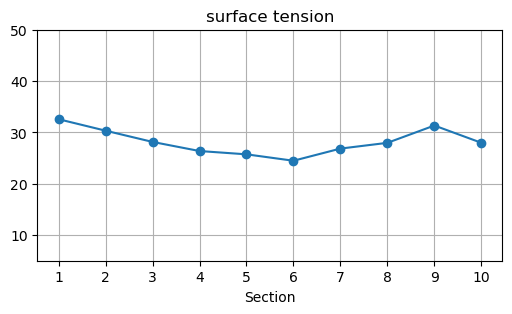

In [64]:
# Plotting the averages of each section with dots connected by lines
plt.figure(figsize=(6, 3))
sections = np.arange(1, blocks+1)  # Section numbers (1 to 8 for this example)
plt.plot(sections, averages, '-o', label='Section Averages')
plt.xlabel('Section')

plt.title('surface tension')

time_points = np.linspace(0, blocks+1, len(averages))
plt.xticks(sections)
plt.grid(True)
plt.ylim(5,50)
plt.show()

# Method 2: average of individual arrays


In [68]:

# Assuming calculate_surface_tension is defined
# Assuming file_paths is a list of file paths

N_chunks = 4

chunk_averages_all_files = []
chunk_stds_all_files = []

for file_path in file_paths:
    gamma_values = []
    with open(file_path, 'r') as file:
        for line in file:
            components = line.strip().split()
            P_xx_bar, P_yy_bar, P_zz_bar = float(components[1]), float(components[5]), float(components[9])
            Lz_nm = 17  # Assuming this is constant for all calculations
            gamma = calculate_surface_tension(P_xx_bar, P_yy_bar, P_zz_bar, Lz_nm)
            gamma_values.append(gamma)

    # Splitting gamma_values into N_chunks
    chunk_averages = []
    chunk_stds = []
    chunk_size = max(1, len(gamma_values) // N_chunks)  # Ensure at least 1 per chunk
    for i in range(N_chunks):
        start_index = i * chunk_size
        end_index = start_index + chunk_size if i < N_chunks - 1 else len(gamma_values)
        chunk = gamma_values[start_index:end_index]
        chunk_averages.append(np.mean(chunk))
        chunk_stds.append(np.std(chunk))
    
    # Adding the chunk statistics for the current file to the all-files lists
    chunk_averages_all_files.append(chunk_averages)
    chunk_stds_all_files.append(chunk_stds)

# Optionally, print the overall average surface tension
overall_average = np.mean([np.mean(averages) for averages in chunk_averages_all_files])
print(f"Overall average surface tension = {overall_average} mN/m")

# # Plotting
# # Here we will average the statistics across files for each chunk for simplicity
# avg_chunk_averages = np.mean(chunk_averages_all_files, axis=0)
# avg_chunk_stds = np.mean(chunk_stds_all_files, axis=0)
# time_points = range(1, N_chunks + 1)



Overall average surface tension = nan mN/m


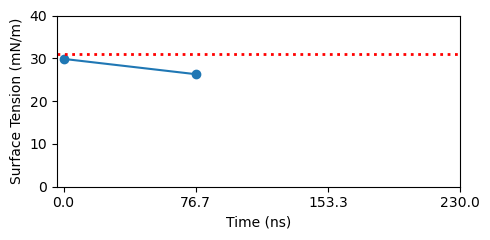

In [69]:
plt.figure(figsize=(5, 2.5))  # Smaller figure size; adjust as needed

time_points_ns = np.linspace(0, 230, N_chunks)  # Generates points from 20 to 120 ns
avg_chunk_averages = np.mean(chunk_averages_all_files, axis=0)

plt.plot(time_points_ns, avg_chunk_averages, '-o')  # Plotting the average values
plt.axhline(y=31, color='red', linestyle=':', linewidth=2)  # Dotted red line at y=31
plt.xlabel('Time (ns)')
plt.ylabel('Surface Tension (mN/m)')
# plt.title('Surface Tension over Time')
plt.xticks(time_points_ns)  # Set x-axis to show 20, 40, 60, ..., up to 120 ns
plt.ylim(0, 40)  # Adjust y-axis limits if necessary

plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.savefig('st2.png')
plt.show()


In [36]:
avg_chunk_averages

array([30.06671823, 26.39160557,         nan,         nan])

In [37]:
np.std(avg_chunk_averages)

nan

In [38]:
np.average(avg_chunk_averages)

nan

In [535]:
average_per_file[130:150]

[41.93703668343,
 20.96357917353,
 28.166215659802504,
 36.04427461049625,
 30.897142192691252,
 30.981394938374997,
 24.210171685389373,
 40.07444551044375,
 30.017488637771255,
 38.646981205455,
 28.36459567738125,
 31.252224701958752,
 10.42312253842125,
 34.300627578315,
 20.01531822299625,
 27.27726055600875,
 19.50001783325892]

In [533]:
np.average(average_per_file[60:80])

28.007124871052575

In [409]:
ls = []
for row in average_per_file:
    if row <10:
        continue
    else: ls.append(row)

In [410]:
ls

[36.95405491235062,
 37.06904476017094,
 31.68600283288125,
 41.57499198649125,
 14.3902527267975,
 22.81985419184625,
 26.82293011804875,
 23.317275659711253,
 14.357794413086248,
 28.574201476511252,
 33.03673149128625,
 22.754612437830005,
 31.20039504435,
 30.408588606499688,
 29.500676727512808,
 30.214439476357505,
 28.04387235275719,
 35.81731639595813,
 32.56349414523187,
 31.04301252132281,
 27.67285011389719,
 35.46480400164844,
 28.71021549556125,
 39.03279009414095,
 23.53134419814281,
 26.539236430107188,
 27.038482762488748,
 24.042450373528126,
 43.56903664286906,
 34.306049807104685,
 26.857058204431873,
 19.038218758912503,
 27.73809389188031,
 23.24763296197781,
 19.96336725656437,
 31.927539185594057,
 35.64480280423125,
 28.568219750070007,
 15.915238236824063,
 21.335066451076877,
 25.641726728874374,
 26.94304096809937,
 29.445121635897188,
 32.851391806156876,
 29.74046833465313,
 36.55631631550616,
 24.52976063278323,
 32.581846755601134,
 27.83430787202378,
 19

In [411]:
np.average(ls)

28.016700909392096